In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('fake_or_real_news.csv')
data = data.set_index("Unnamed: 0")
data2 = data.copy() # Store for later for topic modeling
data.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
data.shape

(6335, 3)

In [3]:
y = data.copy()

In [4]:
y.drop("label",axis=1)
y.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
y['text'] = y['text'].apply(lambda x: ''.join([" " if ord(i) < 32 or (ord(i) > 32 and ord(i) < 65) or (ord(i) > 90 and ord(i) < 97) or ord(i) > 122 else i for i in x]))
y['title'] = y['title'].apply(lambda x: ''.join([" " if ord(i) < 32 or (ord(i) > 32 and ord(i) < 65) or (ord(i) > 90 and ord(i) < 97) or ord(i) > 122 else i for i in x]))

#filter out numbers and special characters

In [6]:
y['text'] = y['text'].str.lower()
y['title'] = y['title'].str.lower()
y['label'] = y['label'].str.lower()
y.head()

,title,text,label
Unnamed: 0,,,
8476,you can smell hillary s fear,daniel greenfield a shillman journalism fello...,fake
10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake
3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said mon...,real
10142,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november t...,fake
875,the battle of new york why this primary matters,it s primary day in new york and front runners...,real


In [7]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # You may need to run this first
stop_array = (stopwords.words('english'))
#set(stopwords.words('english'))

# Remove stop words
y['text'] = y['text'].apply(lambda row: ' '.join([" " if word in stop_array else word for word in row.split()]))
y['title'] = y['title'].apply(lambda row: ' '.join([" " if word in stop_array else word for word in row.split()]))

In [8]:
# Delete all non-English words. This is a problem because it also deletes names not in the corpus
# Could keep as an option to see if it increases accuracy
opt = y.copy()
words = set(nltk.corpus.words.words())
opt['text'] = opt['text'].apply(lambda row: ' '.join([" " if w not in words else w for w in row.split()]))
opt['title'] = opt['title'].apply(lambda row: ' '.join([" " if w not in words else w for w in row.split()]))
opt.head()

,title,text,label
Unnamed: 0,,,
8476,smell fear,journalism fellow freedom center new yor...,fake
10294,watch exact moment political suicide tru...,print delicious pocket two funda...,fake
3608,kerry go gesture sympathy,u secretary state f kerry said stop late...,real
10142,twitter erupt anger tried warn,king lesson tonight time start lis...,fake
875,battle new york primary,primary day new york front trump leadi...,real


In [9]:
y.head()
# TODO: Might need to lemmatize words before vectorizing them

,title,text,label
Unnamed: 0,,,
8476,smell hillary fear,daniel greenfield shillman journalism fellow...,fake
10294,watch exact moment paul ryan committed polit...,google pinterest digg linkedin reddit stumbleu...,fake
3608,kerry go paris gesture sympathy,u secretary state john f kerry said monday...,real
10142,bernie supporters twitter erupt anger ...,kaydee king kaydeeking november lesson ton...,fake
875,battle new york primary matters,primary day new york front runners hil...,real


In [10]:
y2 = y.copy()
# With text
X_train, X_test, y_train, y_test = train_test_split(y['text'], y2, test_size=0.33, random_state=53)

# With headlines
X_train2, X_test2, y_train2, y_test2 = train_test_split(y['title'], y2, test_size=0.33, random_state=53)

In [11]:
# Use tf-idf and count vectorizer to find most relevant words in corpus
# TfidfVectorizer should remove stop words and words that appear in more than 70% of the articles

# Vectorizers have an ngram range! Check if bigrams will improve accuracy
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english') # already gets rid of stop words
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  
tfidf_test = tfidf_vectorizer.transform(X_test)

In [12]:
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[:10])

['zweiter', 'zwick', 'zwicker', 'zwischenmenschlicher', 'zwvgl', 'zxua', 'zxycmwjdxj', 'zybvwqhlbctginctv', 'zyzs', 'zz']
['aa', 'aaa', 'aaas', 'aab', 'aadmi', 'aaeeb', 'aahing', 'aaib', 'aaingr', 'aalia']


In [13]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,aa,aaa,aaas,aab,aadmi,aaeeb,aahing,aaib,aaingr,aalia,...,zweiter,zwick,zwicker,zwischenmenschlicher,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyzs,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
count_df.describe()

,aa,aaa,aaas,aab,aadmi,aaeeb,aahing,aaib,aaingr,aalia,...,zweiter,zwick,zwicker,zwischenmenschlicher,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyzs,zz
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.002828,0.000707,0.000236,0.002121,0.000236,0.001178,0.000236,0.000236,0.000236,0.000236,...,0.000236,0.001414,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236
std,0.086798,0.026581,0.015350,0.109614,0.015350,0.076751,0.015350,0.015350,0.015350,0.015350,...,0.015350,0.057424,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,7.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.describe()

,aa,aaa,aaas,aab,aadmi,aaeeb,aahing,aaib,aaingr,aalia,...,zweiter,zwick,zwicker,zwischenmenschlicher,zwvgl,zxua,zxycmwjdxj,zybvwqhlbctginctv,zyzs,zz
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.000141,0.000033,0.000005,0.000128,0.000015,0.000021,0.000011,0.000013,0.000009,0.000016,...,0.000010,0.000046,0.000006,0.000010,0.000009,0.000009,0.000014,0.000009,0.000009,0.000009
std,0.003542,0.001356,0.000295,0.005607,0.000966,0.001377,0.000726,0.000854,0.000556,0.001073,...,0.000674,0.002005,0.000367,0.000674,0.000556,0.000556,0.000938,0.000556,0.000587,0.000556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.100145,0.068200,0.019221,0.330476,0.062928,0.089688,0.047298,0.055611,0.036212,0.069874,...,0.043893,0.112800,0.023886,0.043893,0.036212,0.036212,0.061085,0.036212,0.038261,0.036212


In [16]:
print(count_df.equals(tfidf_df)) # check if the vectorizers extracted different tokens

False


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# MultinomialNB
multi_nb = MultinomialNB()
np.shape(tfidf_train)
np.shape(y_train)
multi_nb.fit(tfidf_train, y_train['label'])
pred = multi_nb.predict(tfidf_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score) # Multinomial Naive Bayes accuracy: 0.857

accuracy:   0.859


In [18]:
# Use a confusion matrix to compare accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])

In [19]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


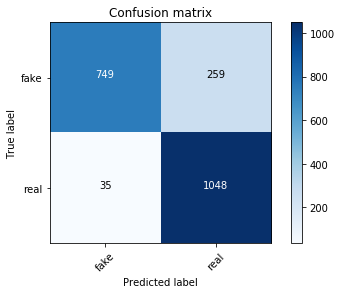

In [20]:
plot_confusion_matrix(cm, classes=['fake', 'real'])
plt.show()

In [21]:
count_multi_nb = MultinomialNB()
count_multi_nb.fit(count_train,y_train['label'])
c_pred = count_multi_nb.predict(count_test)
c_score = accuracy_score(y_test['label'],pred)
print("accuracy:   %0.3f" % c_score)
# this isn't outperforming tf-idf for some reason

accuracy:   0.859


/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.934
Confusion matrix, without normalization


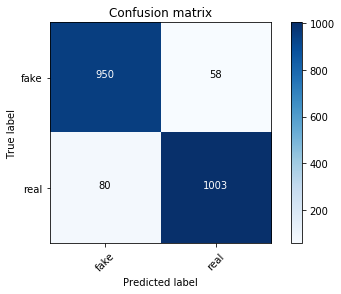

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train['label'])
pred = linear_clf.predict(tfidf_test)
linear_score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % linear_score)
linear_cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])
plot_confusion_matrix(linear_cm, classes=['fake', 'real'])
plt.show()

In [23]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train['label'])
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test['label'], pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.87661
Alpha: 0.10 Score: 0.89718
Alpha: 0.20 Score: 0.89240
Alpha: 0.30 Score: 0.88905
Alpha: 0.40 Score: 0.88666
Alpha: 0.50 Score: 0.88140
Alpha: 0.60 Score: 0.87709
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86514
Alpha: 0.90 Score: 0.86131


In [24]:
def most_informative(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    for coef,feat in topn_class1:
        print(class_labels[0],coef,feat)    
    print()
    for coef,feat in reversed(topn_class2):
        print(class_labels[1],coef,feat)

In [25]:
most_informative(tfidf_vectorizer,linear_clf,n=30)

fake -4.953088615831283 october
fake -4.227898146209729 hillary
fake -3.253562520865632 share
fake -3.1897902003015357 november
fake -2.8507254773499118 article
fake -2.5948874289153627 oct
fake -2.557862687567659 print
fake -2.417053571096979 email
fake -2.2863557964295236 advertisement
fake -2.276736854147787 source
fake -2.235389646197955 mosul
fake -2.0929633887911607 establishment
fake -2.08110896106324 war
fake -2.0495137396489476 nov
fake -1.9514667845193616 election
fake -1.9338753910571158 pipeline
fake -1.9250947639848939 com
fake -1.9037368810448945 podesta
fake -1.8947663307899714 snip
fake -1.8458127317731292 donald
fake -1.8086455956928522 ayotte
fake -1.8062448982773303 th
fake -1.7697639571197883 pm
fake -1.7631686309408168 corporate
fake -1.7615900302042924 wikileaks
fake -1.7419688151452533 photo
fake -1.7006966065317495 brexit
fake -1.6937641257683749 daesh
fake -1.6787523151192238 reuters
fake -1.6633522099642635 jewish

real 4.804059454001326 said
real 2.6723541332

In [26]:
# Most real
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20] # zip coefficients and sort them

[(-6.217829630710521, 'trump'),
 (-6.456655526108935, 'said'),
 (-6.6130755955398675, 'clinton'),
 (-7.000155002312522, 'obama'),
 (-7.106517990098555, 'sanders'),
 (-7.174732553936943, 'president'),
 (-7.229376134911667, 'campaign'),
 (-7.247530955461162, 'republican'),
 (-7.302173890576507, 'state'),
 (-7.30328589038156, 'cruz'),
 (-7.338998469390379, 'party'),
 (-7.406591947405525, 'new'),
 (-7.437086945717752, 'people'),
 (-7.496550052461004, 'percent'),
 (-7.515244735335175, 'bush'),
 (-7.539405668232934, 'republicans'),
 (-7.545348625818594, 'house'),
 (-7.591834612522435, 'voters'),
 (-7.60908197321694, 'rubio'),
 (-7.634394742602616, 'states')]

In [27]:
# Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.320426046643918, 'aa'),
 (-11.320426046643918, 'aaas'),
 (-11.320426046643918, 'aab'),
 (-11.320426046643918, 'aadmi'),
 (-11.320426046643918, 'aaeeb'),
 (-11.320426046643918, 'aaib'),
 (-11.320426046643918, 'aaingr'),
 (-11.320426046643918, 'aaluijqn'),
 (-11.320426046643918, 'aam'),
 (-11.320426046643918, 'aamon'),
 (-11.320426046643918, 'aaojejptcy'),
 (-11.320426046643918, 'aap'),
 (-11.320426046643918, 'aau'),
 (-11.320426046643918, 'ab'),
 (-11.320426046643918, 'aba'),
 (-11.320426046643918, 'abandonnig'),
 (-11.320426046643918, 'abate'),
 (-11.320426046643918, 'abay'),
 (-11.320426046643918, 'abbar'),
 (-11.320426046643918, 'abbot')]

In [28]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [29]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


accuracy:   0.901
Confusion matrix, without normalization


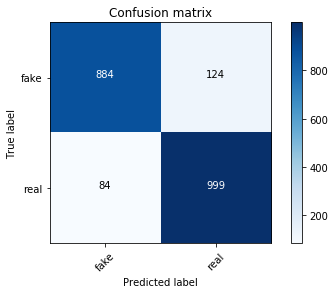

In [31]:
clf = MultinomialNB(alpha=.01)
clf.fit(hash_train, y_train['label'])
pred = clf.predict(hash_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test['label'], pred, labels=['fake', 'real'])
plot_confusion_matrix(cm, classes=['fake', 'real'])
plt.show()

In [ ]:
# defining fake news with simple bag-of-words or TF-IDF vectors is an oversimplified approach

In [ ]:
# look up how to make an ROC curve

In [ ]:
# TODO: LDA Vis

In [ ]:
# Visualizations of fake news categories
# Features most associated with the different fake news categories
# Domain names, sentiment analysis

In [37]:
dict_sample = y['text'][0:y.shape[0]].str.cat(sep=' ') # Dump sample vocab for topic modeling

In [ ]:
f = open('articles.txt','w',encoding='utf-8')
f.write(dict_sample)
f.close()

In [33]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [38]:
sent = LineSentence('articles.txt')

# learn the dictionary 
article_dict = Dictionary(sent)
    
# filter tokens that are very rare or too common from
# the dictionary (filter_extremes) and reassign integer ids (compactify)
article_dict.filter_extremes(no_below=5, no_above=0.2)
article_dict.compactify()

article_dict.save('articles.dict')
    
# load the finished dictionary from disk
article_dict = Dictionary.load('articles.dict')

In [39]:
def bow(filepath,d): # output bag of words representation
    for review in LineSentence(filepath):
        yield d.doc2bow(review)

In [40]:
# generate bag-of-words representations for all reviews and save them as a matrix
MmCorpus.serialize('articles.mm',
                       bow('articles.txt',article_dict))
    
# load the finished bag-of-words corpus from disk
corpus = MmCorpus('articles.mm')

In [ ]:
# Create LDA model (Runs outside of Jupyter for some reason)
# lda = LdaMulticore(corpus,num_topics=10,
#                    id2word=article_dict, 
#                    workers=2)
    
# lda.save('./lda_model')

In [34]:
lda = LdaMulticore.load('./lda_model')

In [35]:
def topics(topic_number, topn=5):
    print(u'{:10} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=25):
        print(u'{:10} {:.3f}'.format(term, round(frequency, 3)))

In [36]:
topics(topic_number = 2)

term       frequency

zika       0.001
organic    0.001
arabs      0.001
halloween  0.001
khan       0.001
palestine  0.001
lesley     0.000
vaccine    0.000
afghan     0.000
tpp        0.000
harris     0.000
lewandowski 0.000
egyptian   0.000
epa        0.000
infowars   0.000
indigenous 0.000
holder     0.000
cdc        0.000
utm        0.000
villages   0.000
stevens    0.000
shirt      0.000
wasserman  0.000
virus      0.000
emissions  0.000


In [41]:
# Ignore warning
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, corpus,
                                              article_dict)

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [42]:
# Visualization for general corpus
pyLDAvis.display(LDAvis_prepared)

In [ ]:
fake_dataset = pd.read_csv('fake.csv')

In [ ]:
fake_dataset.head(5)

In [ ]:
fake_dataset.shape

In [ ]:
fake_dataset.type.unique()

In [ ]:
fake_dataset.groupby(['type']).size().plot(kind='barh')
plt.show()

In [ ]:
# Remove all stop words from larger corpora
# This will take a lot of time because there's a lot of data

for token in headline_text:
    if token in stop_array:
        headline_text.remove(token)
        
for token in article_text:
    if token in stop_array:
        article_text.remove(token)

In [ ]:
# POS tag and then stem


In [ ]:
# Lemmatize the words
# Might need to tag parts of speech first and lemmatize based on that
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

headline_lemma = []
article_lemma = []

for token in headline_text:
    headline_lemma.append(lemmatizer.lemmatize(token))

for token in article_text:
    article_lemma.append(lemmatizer.lemmatize(token))

In [ ]:
from nltk.probability import FreqDist
# Parse out words that appear too often

fdist1 = FreqDist(headline_text)
fdist1

In [ ]:
# Save separate file with bigrams and see if they enhance text classification

In [ ]:
# Tokenize within the dataframe
# Maybe put them in a dictionary instead? It takes a while to keep them in a dataframe
# d = data2.to_dict()
# d = data.to_dict() # {{id: title}, {id: text}, {id: class}}, could possibly use to make things faster
data2['text'] = data2.apply(lambda row: word_tokenize(row['text']),axis=1)
data2['title'] = data2.apply(lambda row: word_tokenize(row['title']),axis=1)
data2.head

In [ ]:
# Convert into dummy variables
copy = tfidf_df.copy()
#copy['label'] = copy['label'].apply(lambda x: 1 if x == 'FAKE' else 0)

# Import into a pickle model
from sklearn.externals import joblib
joblib.dump(multi_nb, 'model.pkl')
model_columns = list(copy.columns)
joblib.dump(model_columns, 'model_columns.pkl')